**ANÁLISIS PREDICTIVO DE FALLO CARDÍACO:
COMPARACIÓN DE MODELOS DE MACHINE LEARNING**

**AUTOR:** PABLO BAUTISTA SÁNCHEZ

El Dataset utilizado para este análisis es el "Heart Failure Prediction Dataset". Este conjunto de datos nos servirá para predecir la insuficiencia cardíaca utilizando una serie de características relacionadas con la salud cardiovascular de los pacientes.
Esta base de datos tiene 918 registros de pacientes en las que se recogen 11 características más la objetivo.

**Lectura de datos**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**2. Etapas del Proceso de Modelización Analítica**

  2.1. Análisis Descriptivo del Conjunto de Datos
  
  2.1.1. Estadísticas Descriptivas

  **Análisis descriptivo**

In [4]:
# Resumen estadístico para variables numéricas
print("Resumen Estadístico de Variables Numéricas:")
print(df.describe())

# Identificamos las columnas categóricas y sus frecuencias
print("\nFrecuencia de Variables Categóricas:")
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())

Resumen Estadístico de Variables Numéricas:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  

Frecuencia de Vari

**Análisis de correlación**

                        Age  RestingBP  Cholesterol  FastingBS     MaxHR  \
Age                1.000000   0.254399    -0.095282   0.198039 -0.382045   
RestingBP          0.254399   1.000000     0.100893   0.070193 -0.112135   
Cholesterol       -0.095282   0.100893     1.000000  -0.260974  0.235792   
FastingBS          0.198039   0.070193    -0.260974   1.000000 -0.131438   
MaxHR             -0.382045  -0.112135     0.235792  -0.131438  1.000000   
Oldpeak            0.258612   0.164803     0.050148   0.052698 -0.160691   
HeartDisease       0.282039   0.107589    -0.232741   0.267291 -0.400421   
Sex_M              0.055750   0.005133    -0.200092   0.120076 -0.189186   
ChestPainType_ATA -0.218165  -0.046153     0.150954  -0.140514  0.253735   
ChestPainType_NAP -0.011335  -0.041348    -0.006634  -0.039249  0.134580   
ChestPainType_TA   0.032042   0.049855     0.017365   0.026885  0.100025   
RestingECG_Normal -0.230566  -0.116851    -0.038470  -0.093028  0.023801   
RestingECG_S

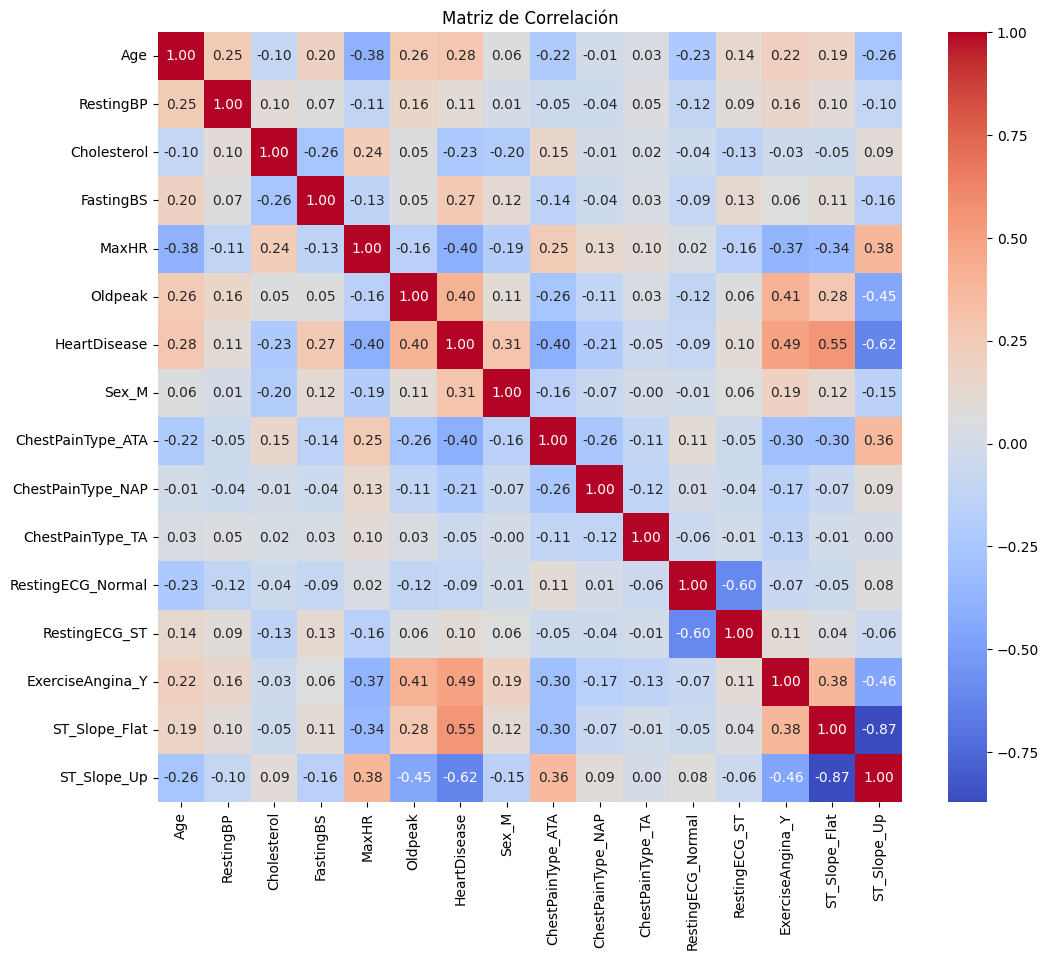

In [5]:
# Convertimos las variables categóricas a variables numéricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculamos la matriz de correlación
correlacion = df_encoded.corr()

# Mostramos la matriz de correlación
print(correlacion)

# Visualizamos la matriz de correlación como un mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

2.1.2. Visualizaciones Gráficas

**- Histogramas para Variables Numéricas**

Herramienta clave para visualizar la distribución de variables numéricas y, en nuestro caso, para identificar patrones relacionados con la cardiopatía.

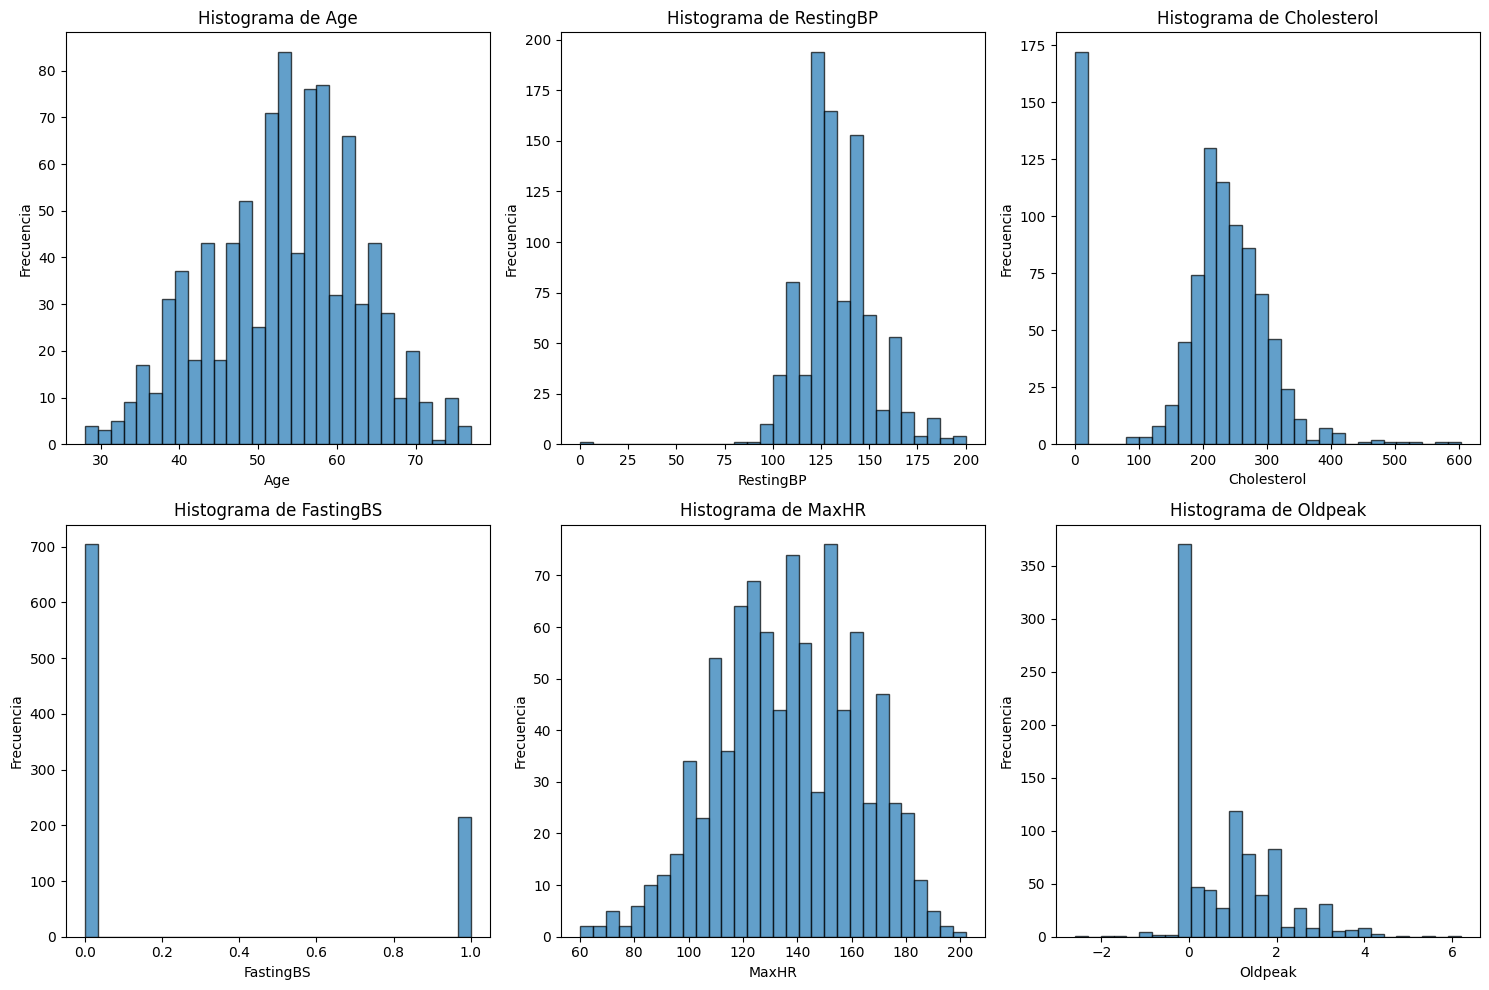

In [6]:
import matplotlib.pyplot as plt

# Creamos una lista con las variables numéricas
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Creamos histograma para cada variable numérica
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

**- Gráficos de Caja (Boxplots)**

Los gráficos de caja nos permiten identificar outliers y la dispersión de las variables.


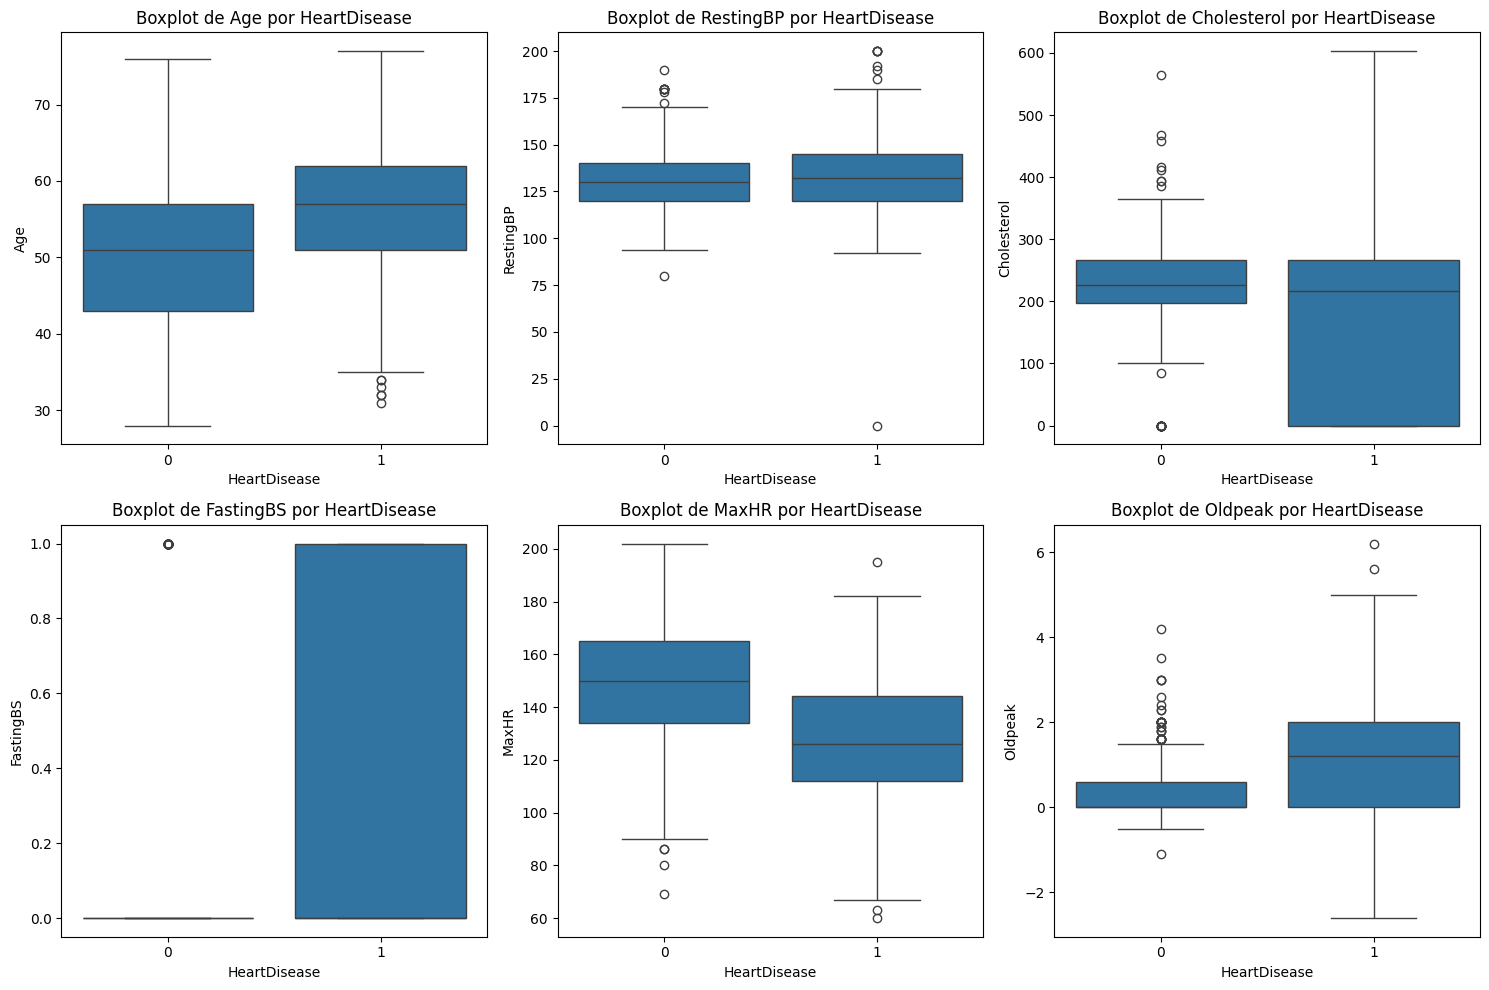

In [7]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df['HeartDisease'], y=df[column])
    plt.title(f'Boxplot de {column} por HeartDisease')
    plt.xlabel('HeartDisease')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

**- Gráficos de Dispersión (Scatter Plots)**

Los gráficos de dispersión nos ayudan a visualizar la relación entre dos variables numéricas, identificar patrones y relaciones significativas entre estas variables.

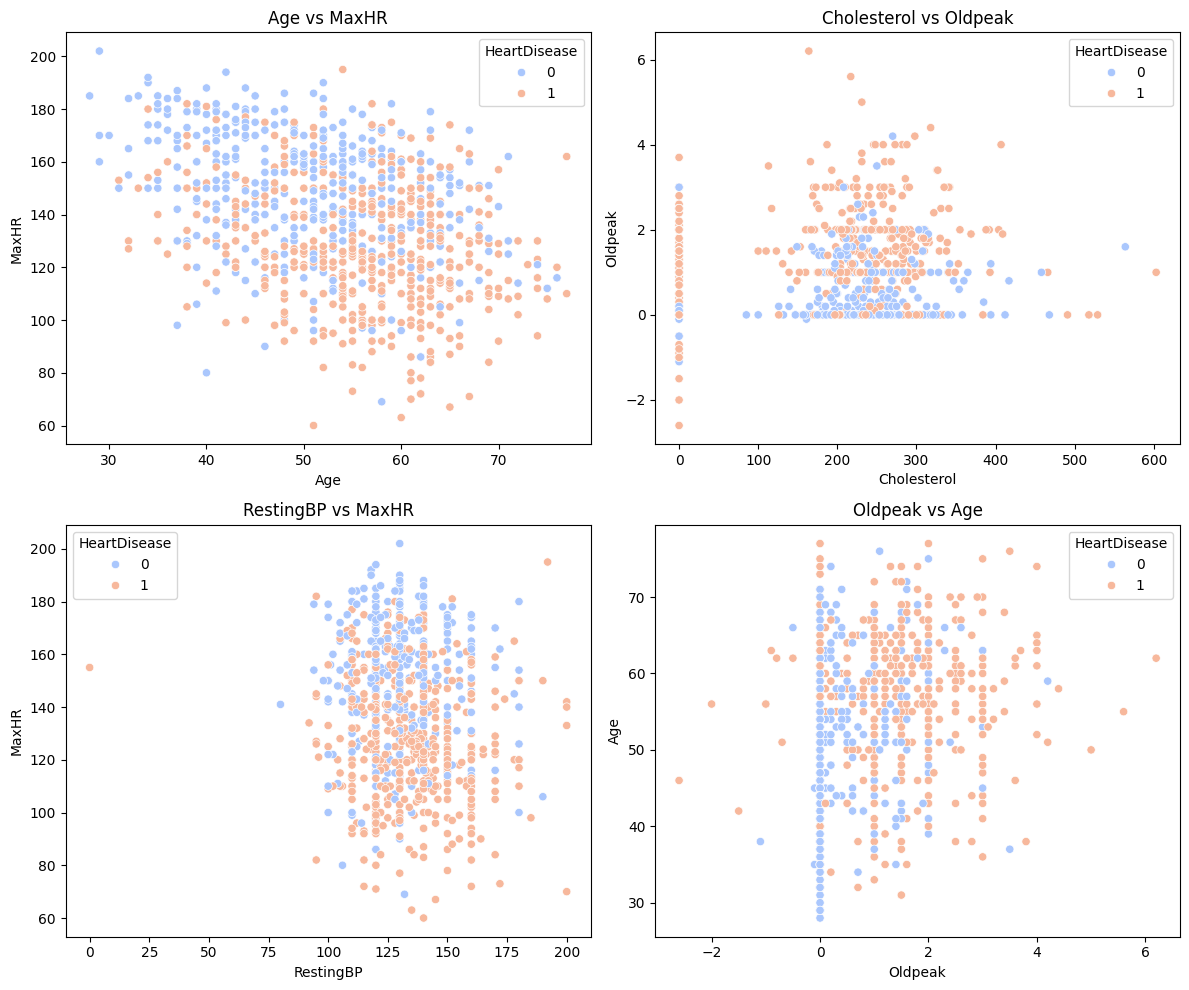

In [8]:
plt.figure(figsize=(12, 10))

# Gráfico de dispersión entre Age y MaxHR
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Age', y='MaxHR', hue='HeartDisease', palette='coolwarm')
plt.title('Age vs MaxHR')

# Gráfico de dispersión entre Cholesterol y Oldpeak
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Cholesterol', y='Oldpeak', hue='HeartDisease', palette='coolwarm')
plt.title('Cholesterol vs Oldpeak')

# Gráfico de dispersión entre RestingBP y MaxHR
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='RestingBP', y='MaxHR', hue='HeartDisease', palette='coolwarm')
plt.title('RestingBP vs MaxHR')

# Gráfico de dispersión entre Oldpeak y Age
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Oldpeak', y='Age', hue='HeartDisease', palette='coolwarm')
plt.title('Oldpeak vs Age')

plt.tight_layout()
plt.show()

**- Gráficos de Barras para Variables Categóricas**

Los gráficos de barras nos ilustran la relación entre diferentes variables categóricas y la presencia o ausencia de insuficiencia cardíaca.

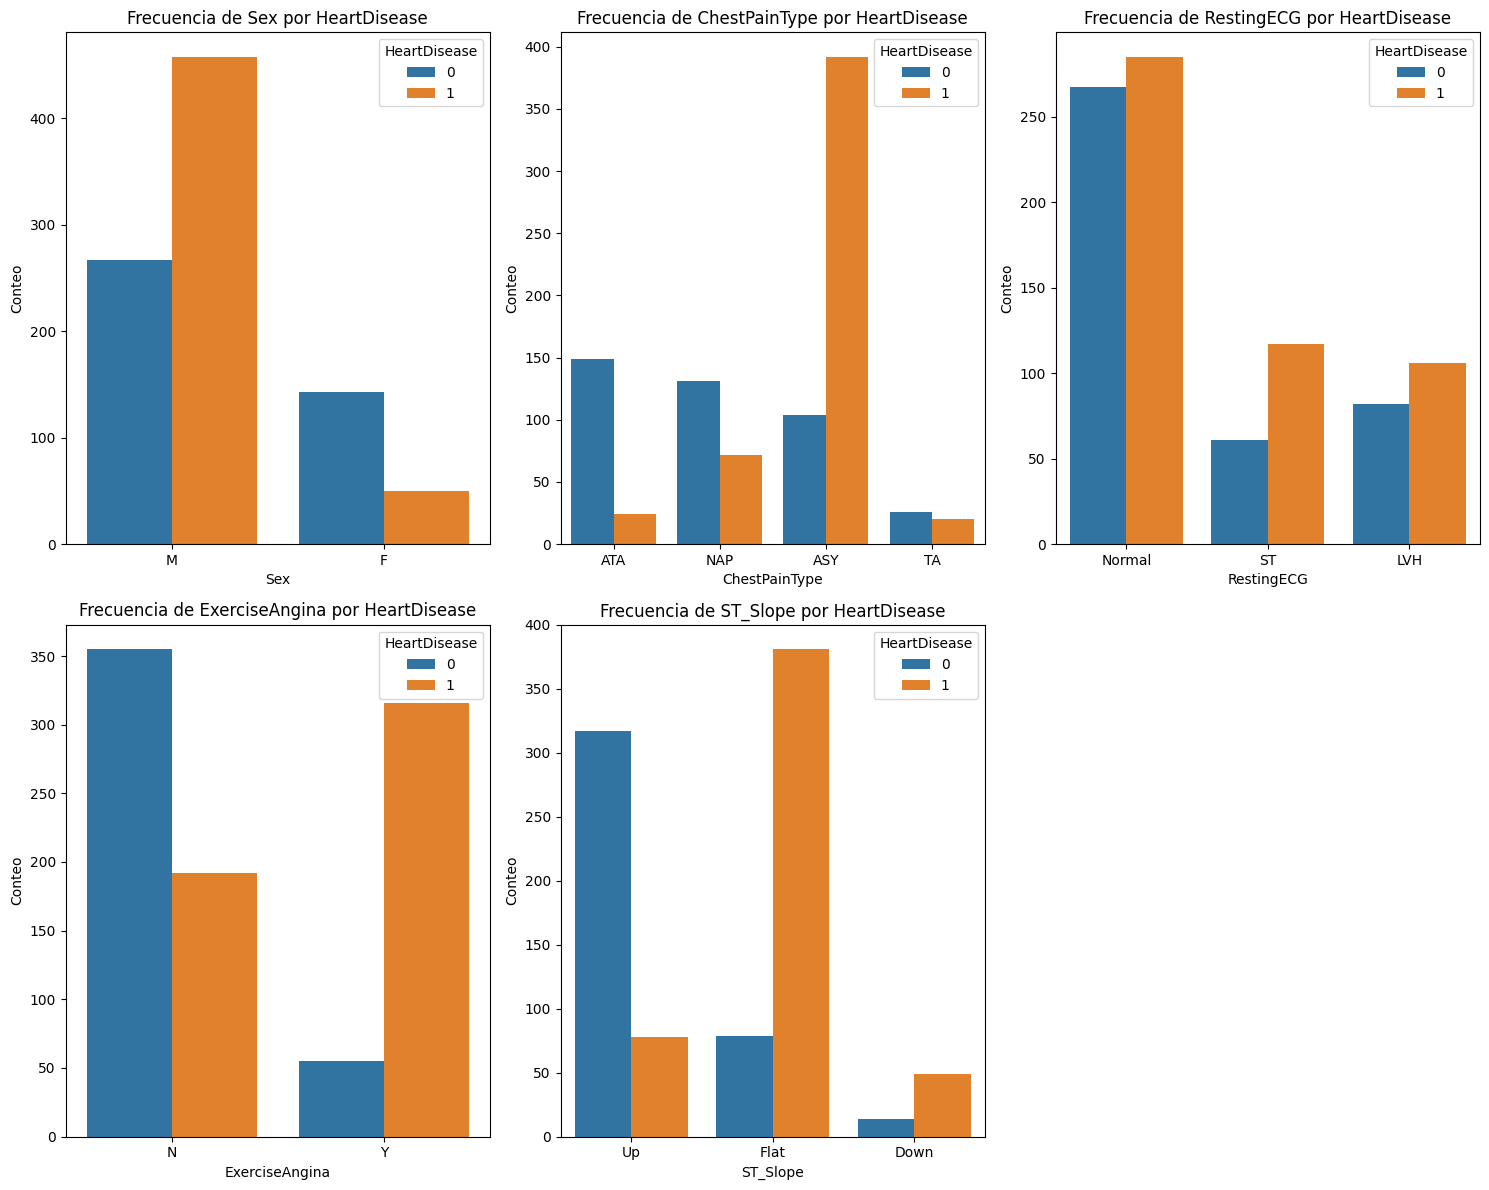

In [9]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

plt.figure(figsize=(15, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=column, hue='HeartDisease')
    plt.title(f'Frecuencia de {column} por HeartDisease')
    plt.xlabel(column)
    plt.ylabel('Conteo')

plt.tight_layout()
plt.show()

**-  Gráfico de Distribución de HeartDisease**

Para entender la distribución de la variable objetivo HeartDisease.

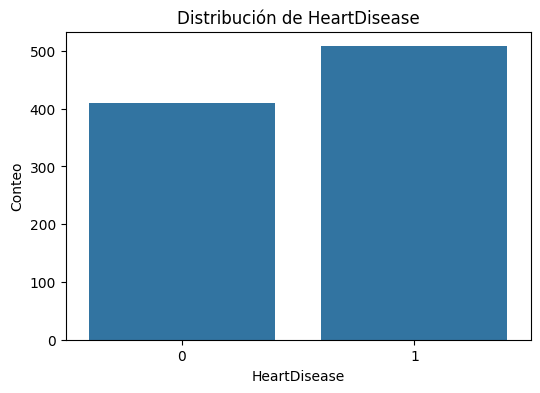

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='HeartDisease')
plt.title('Distribución de HeartDisease')
plt.xlabel('HeartDisease')
plt.ylabel('Conteo')
plt.show()

2.2. Transformación del Conjunto de Datos

2.2.1. Preprocesamiento de los Datos

Lo primero que vamos a hacer es comprobar qué variables son categóricas, para luego codificarlas.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
from sklearn.preprocessing import OneHotEncoder

# 1. Codificamos las variables binarias (con dos categorías)

# Sex: M -> 1, F -> 0
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})

# ExerciseAngina: Y -> 1, N -> 0
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})

# 2. One-Hot Encoding para variables categóricas con más de dos categorías

# Variables categóricas con más de dos categorías
categorical_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']

# Aplicamos One-Hot Encoding a estas variables
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

# Transformamos las variables categóricas
encoded_df = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_cols]))

# Los nombres de las columnas de las variables codificadas
encoded_df.columns = one_hot_encoder.get_feature_names_out(categorical_cols)

# Añadimos las variables codificadas al dataset original y eliminamos las columnas originales
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

# 3. Conversión de Tipos de Datos

# Nos aseguramos de que las variables numéricas están correctamente tipificadas
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Mostramos el resultado
print(df.head())

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               0   
1   49    0        160          180          0    156               0   
2   37    1        130          283          0     98               0   
3   48    0        138          214          0    108               1   
4   54    1        150          195          0    122               0   

   Oldpeak  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0      0.0             0                1.0                0.0   
1      1.0             1                0.0                1.0   
2      0.0             0                1.0                0.0   
3      1.5             1                0.0                0.0   
4      0.0             0                0.0                1.0   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  \
0               0.0                1.0            0.0            0.0   
1               0.0 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    int64  
 3   Cholesterol        918 non-null    int64  
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    int64  
 6   ExerciseAngina     918 non-null    int64  
 7   Oldpeak            918 non-null    float64
 8   HeartDisease       918 non-null    int64  
 9   ChestPainType_ATA  918 non-null    float64
 10  ChestPainType_NAP  918 non-null    float64
 11  ChestPainType_TA   918 non-null    float64
 12  RestingECG_Normal  918 non-null    float64
 13  RestingECG_ST      918 non-null    float64
 14  ST_Slope_Flat      918 non-null    float64
 15  ST_Slope_Up        918 non-null    float64
dtypes: float64(8), int64(8)
me

2.2.2. Tratamiento de Valores Faltantes

In [14]:
df.isnull().sum()

,0
Age,0
Sex,0
RestingBP,0
Cholesterol,0
FastingBS,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0
HeartDisease,0
ChestPainType_ATA,0


Podemos ver que no hay valores nulos, pero encontramos una anomalía en la variable 'Cholesterol' que era la presencia de una moda en 0 mg/dl,  lo cual es fisiológicamente improbable y sugiere la posibilidad de registros faltantes o errores en la codificación de los datos.

In [15]:
# Contamos cuántos registros tienen Cholesterol = 0
cholesterol_ceros = df[df['Cholesterol'] == 0]
print(f"Cantidad de registros con Cholesterol igual a 0: {cholesterol_ceros.shape[0]}")

Cantidad de registros con Cholesterol igual a 0: 172


In [16]:
# Calculamos la mediana de Cholesterol excluyendo los ceros, para luego imputarlos
median_cholesterol = df[df['Cholesterol'] != 0]['Cholesterol'].median()

# Imputamos los valores de 0 en Cholesterol con la mediana
df['Cholesterol'] = df['Cholesterol'].replace(0, median_cholesterol)

# Comprobamos que los valores han sido imputados
print(df['Cholesterol'].describe())

count    918.000000
mean     243.204793
std       53.401297
min       85.000000
25%      214.000000
50%      237.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64


In [17]:
# Comprobamos si aún hay valores de 0 en Cholesterol
cholesterol_ceros_final = df[df['Cholesterol'] == 0]
print(f"Cantidad de registros con Cholesterol igual a 0 después del tratamiento: {cholesterol_ceros_final.shape[0]}")

Cantidad de registros con Cholesterol igual a 0 después del tratamiento: 0


A continuación creamos un histograma de la variable 'Cholesterol' para ver cómo se comporta ahora la variable:

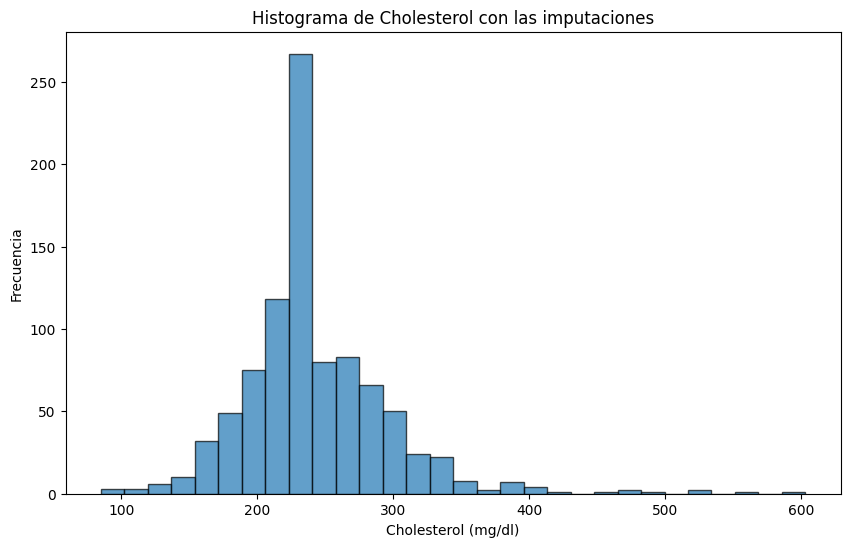

In [18]:
# Creamos histograma para Cholesterol
plt.figure(figsize=(10, 6))
plt.hist(df['Cholesterol'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma de Cholesterol con las imputaciones')
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('Frecuencia')

plt.show()

La imputación de valores faltantes ha corregido la anomalía de la moda en 0 mg/dl y ha revelado una distribución que se aproxima a una forma normal, con picos notables alrededor de 200 y 237 mg/dl.

In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creamos una lista con las columnas numéricas
columns_numericas = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Escalamiento
standard_scaler = StandardScaler()
df[columns_numericas] = standard_scaler.fit_transform(df[columns_numericas])

# Mostramos la información del DataFrame para verificar los cambios
print(df.head())

        Age  Sex  RestingBP  Cholesterol  FastingBS     MaxHR  ExerciseAngina  \
0 -1.433140    1   0.410909     0.858035  -0.551341  1.382928               0   
1 -0.478484    0   1.491752    -1.184227  -0.551341  0.754157               0   
2 -1.751359    1  -0.129513     0.745617  -0.551341 -1.525138               0   
3 -0.584556    0   0.302825    -0.547191  -0.551341 -1.132156               1   
4  0.051881    1   0.951331    -0.903182  -0.551341 -0.581981               0   

    Oldpeak  HeartDisease  ChestPainType_ATA  ChestPainType_NAP  \
0 -0.832432             0                1.0                0.0   
1  0.105664             1                0.0                1.0   
2 -0.832432             0                1.0                0.0   
3  0.574711             1                0.0                0.0   
4 -0.832432             0                0.0                1.0   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  \
0               0.0                1.0

**2.3. Construcción de Modelos Predictivos**

2.3.1. Técnicas de Modelización Utilizadas

2.3.1.1. Regresión Logística

Primero, vamos a dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba.
Luego entrenamos el modelo de regresión logística y evaluamos el modelo utilizando el conjunto de prueba para verificar su rendimiento.


In [20]:
from sklearn.model_selection import train_test_split

# Separamos características (X) y la variable objetivo 'HeartDisease' (y)
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

# Creamos el modelo de regresión logística
logreg = LogisticRegression(max_iter=1000)

# Entrenamos el modelo
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predecimos los valores en el conjunto de prueba
y_pred = logreg.predict(X_test)

# Evaluamos del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.86
Confusion Matrix:
[[68  9]
 [16 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



Hemos obtenido una precisión (accuracy) del 86%.

La matriz de confusión generada muestra que el modelo identificó correctamente 68 casos negativos (ausencia de enfermedad) y 91 casos positivos (presencia de enfermedad). Sin embargo, hubo 9 falsos positivos y 16 falsos negativos.

El informe de clasificación proporciona métricas adicionales:

- Precisión (precision): El modelo obtuvo una precisión de 0.81 para la clase negativa (ausencia de enfermedad) y 0.91 para la clase positiva (presencia de enfermedad).
- Recall (sensibilidad): La sensibilidad fue de 0.88 para la clase negativa y 0.85 para la clase positiva.
- F1-score: El F1-score, que considera tanto la precisión como la sensibilidad, fue de 0.84 para la clase negativa y 0.88 para la clase positiva.

2.3.1.2. Árboles de Decisión

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separamos características (X) y la variable objetivo 'HeartDisease' (y)
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de árbol de decisión
tree_clf = DecisionTreeClassifier(random_state=42)

# Entrenamos el modelo
tree_clf.fit(X_train, y_train)

# Predecimos los valores en el conjunto de prueba
y_pred_tree = tree_clf.predict(X_test)

# Evaluamos el modelo
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)

# Imprimimos los resultados
print(f'Accuracy: {accuracy_tree:.2f}')
print('Confusion Matrix:')
print(conf_matrix_tree)
print('Classification Report:')
print(class_report_tree)

Accuracy: 0.81
Confusion Matrix:
[[64 13]
 [22 85]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.83      0.79        77
           1       0.87      0.79      0.83       107

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184



Hemos obtenido una precisión (accuracy) del 81%.

La matriz de confusión muestra que el modelo identificó correctamente 64 casos negativos (ausencia de enfermedad) y 85 casos positivos (presencia de enfermedad). Sin embargo, hubo 13 falsos positivos y 22 falsos negativos.

El informe de clasificación proporciona las siguientes métricas:

* Precisión (precision): El modelo obtuvo una precisión de 0.74 para la clase negativa y 0.87 para la clase positiva.

* Recall (sensibilidad): La sensibilidad fue de 0.83 para la clase negativa y 0.79 para la clase positiva.

* F1-score: El F1-score fue de 0.79 para la clase negativa y 0.83 para la clase positiva, lo que refleja un buen balance entre precisión y sensibilidad.

Aunque el árbol de decisión tiene un desempeño general aceptable, el número de falsos negativos es mayor que en la regresión logística, lo que indica que el modelo podría estar menos capacitado para identificar correctamente todos los casos de pacientes enfermos.

2.3.1.3. Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Creamos el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos el modelo con el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Predecimos los valores en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluamos el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Accuracy: {accuracy_rf:.2f}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)

Accuracy: 0.88
Confusion Matrix:
[[65 12]
 [11 96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85        77
           1       0.89      0.90      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



Hemos obtenido una precisión (accuracy) del 88%.

La matriz de confusión muestra que el modelo identificó correctamente 65 casos negativos y 96 casos positivos. Sin embargo, hubo 12 falsos positivos y 11 falsos negativos.

El informe de clasificación proporciona métricas destacables:

* Precisión (precision): El modelo obtuvo una precisión de 0.86 para la clase negativa y 0.89 para la clase positiva.

* Recall (sensibilidad): La sensibilidad fue de 0.84 para la clase negativa y 0.90 para la clase positiva.

* F1-score: El F1-score fue de 0.85 para la clase negativa y 0.89 para la clase positiva.

El modelo Random Forest tiene el mejor rendimiento general entre los tres modelos evaluados, con un equilibrio notable entre precisión y sensibilidad. También presenta un menor número de falsos negativos en comparación con los modelos anteriores, lo que lo convierte en una opción robusta para la predicción de cardiopatías.